In [1]:
import pandas
import seaborn
import numpy
import matplotlib.pyplot as plt

# Scalability benchmark results

The SCIP tool ([commit](https://github.com/ScalableImagingPipeline/dask-pipeline/commit/db5adcd96ad4128e2dbba793676a0bc45ab00b18)) was ran on the Prism cluster on a Vulcan PBMC dataset of 1000 4-channel images. The amount of Dask worker processes was varied from 2 to 16, doubling the number of processes each time. Each measurement was repeated 3 times. Only one cluster node was used, which has 250GB of memory and 24 cores.

In [3]:
df = pandas.read_csv("../benchmark_results/0bd21bb93eb5661fca943748eca46723aae5f81a.csv")

In [4]:
df = pandas.read_csv("../benchmark_results/db5adcd96ad4128e2dbba793676a0bc45ab00b18.csv")

In [5]:
df = pandas.read_csv("../benchmark_results/b41cfad2a105d8e3655704e6cdbb418784465eda.csv")

In [6]:
df = pandas.read_csv("../benchmark_results/96355007c63936adc56ce6ecf4061b6a06561815.csv")

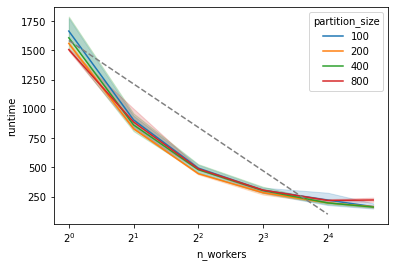

In [18]:
df = pandas.read_csv("../benchmark_results/benchmark_20210930224331.csv")
df["n_workers"] = df["n_workers"].astype("category")
df["partition_size"] = df["partition_size"].astype("category")

ax = seaborn.lineplot(data=df, x="n_workers", y="runtime", hue="partition_size", markers=True) 

baseline = df[df["n_workers"] == 1]["runtime"].mean()
ax.plot((1, 16), (baseline, baseline/16), linestyle="--", color="grey")
ax.set_xscale("log", basex=2)

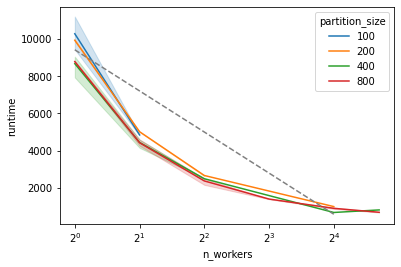

In [19]:
df = pandas.read_csv("../benchmark_results/benchmark_20210930224304.csv")
df["n_workers"] = df["n_workers"].astype("category")
df["partition_size"] = df["partition_size"].astype("category")

ax = seaborn.lineplot(data=df, x="n_workers", y="runtime", hue="partition_size", markers=True) 

baseline = df[df["n_workers"] == 1]["runtime"].mean()
ax.plot((1, 16), (baseline, baseline/16), linestyle="--", color="grey")
ax.set_xscale("log", basex=2)

In [17]:
df.groupby(["n_workers", "partition_size"]).size()

n_workers  partition_size
1          100               3
           200               3
           400               3
           800               3
2          100               3
           200               3
           400               3
           800               3
4          200               3
           400               3
           800               3
8          800               2
16         200               1
           400               1
           800               3
26         400               1
           800               2
dtype: int64